In [ ]:
# install ultralytic
!pip3 install git+https://github.com/ultralytics/ultralytics.git
!pip3 install kaggle opendatasets

In [ ]:
# Download kaggle dataset
import opendatasets as od

od.download(
   'https://www.kaggle.com/datasets/niharika41298/yoga-poses-dataset?resource=download'
)


In [ ]:
!ls /content/yoga-poses-dataset/DATASET/TRAIN

downdog  goddess  plank  tree  warrior2


In [ ]:
import cv2
from PIL import Image
from pydantic import BaseModel

import ultralytics

In [ ]:
model = ultralytics.YOLO(model='yolov8m-pose.pt')

100%|██████████| 50.8M/50.8M [00:00<00:00, 212MB/s]


In [ ]:
image = cv2.imread('/content/yoga-poses-dataset/DATASET/TRAIN/downdog/00000128.jpg')
result = model.predict(image, save=False)[0]
result_keypoint = result.keypoints.xyn.cpu().numpy()[0]
result.boxes.xyxy


0: 448x640 1 person, 245.0ms
Speed: 20.0ms preprocess, 245.0ms inference, 3787.2ms postprocess per image at shape (1, 3, 448, 640)


tensor([[ 66.,  25., 824., 494.]], device='cuda:0')

In [ ]:
result.keypoints[0]

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.5909, 0.6465, 0.2392, 0.8111, 0.2240, 0.9209, 0.5955, 0.7915, 0.1431, 0.5365, 0.1684, 0.8254, 0.6731, 0.9142, 0.8355, 0.6291, 0.5694]], device='cuda:0')
data: tensor([[[3.4987e+02, 4.1581e+02, 5.9093e-01],
         [3.4103e+02, 3.9995e+02, 6.4649e-01],
         [0.0000e+00, 0.0000e+00, 2.3917e-01],
         [3.2953e+02, 3.7114e+02, 8.1105e-01],
         [0.0000e+00, 0.0000e+00, 2.2398e-01],
         [3.3082e+02, 3.1984e+02, 9.2090e-01],
         [4.1300e+02, 2.8145e+02, 5.9554e-01],
         [2.4365e+02, 3.7803e+02, 7.9147e-01],
         [0.0000e+00, 0.0000e+00, 1.4305e-01],
         [1.6658e+02, 4.6449e+02, 5.3652e-01],
         [0.0000e+00, 0.0000e+00, 1.6836e-01],
         [4.8236e+02, 1.0566e+02, 8.2536e-01],
         [5.3521e+02, 1.0486e+02, 6.7312e-01],
         [5.7040e+02, 2.9359e+02, 9.1419e-01],
         [6.3094e+02, 2.7246e+02, 8.3546e-01],
         [6.7333e+02, 4.1478e+02, 6.2914e-01],
         [

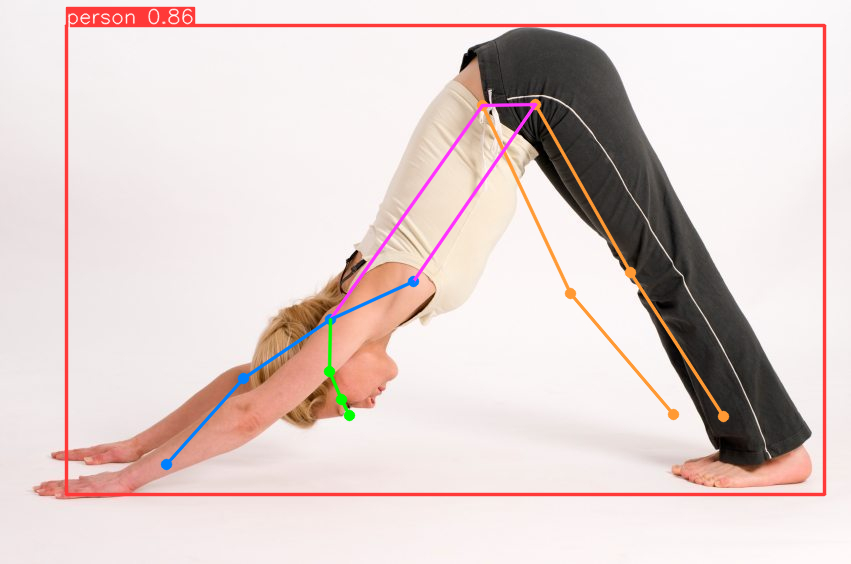

In [ ]:
Image.fromarray(cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB))

In [ ]:
class GetKeypoint(BaseModel):
    NOSE:           int = 0
    LEFT_EYE:       int = 1
    RIGHT_EYE:      int = 2
    LEFT_EAR:       int = 3
    RIGHT_EAR:      int = 4
    LEFT_SHOULDER:  int = 5
    RIGHT_SHOULDER: int = 6
    LEFT_ELBOW:     int = 7
    RIGHT_ELBOW:    int = 8
    LEFT_WRIST:     int = 9
    RIGHT_WRIST:    int = 10
    LEFT_HIP:       int = 11
    RIGHT_HIP:      int = 12
    LEFT_KNEE:      int = 13
    RIGHT_KNEE:     int = 14
    LEFT_ANKLE:     int = 15
    RIGHT_ANKLE:    int = 16

get_keypoint = GetKeypoint()

In [ ]:

import os
import glob


In [ ]:
dataset_root = '/content/yoga-poses-dataset/DATASET/TRAIN'
pose_list = os.listdir(dataset_root)
pose_list


['warrior2', 'goddess', 'tree', 'downdog', 'plank']

In [ ]:
def extract_keypoint(keypoint):
    # nose
    nose_x, nose_y = keypoint[get_keypoint.NOSE]
    # eye
    left_eye_x, left_eye_y = keypoint[get_keypoint.LEFT_EYE]
    right_eye_x, right_eye_y = keypoint[get_keypoint.RIGHT_EYE]
    # ear
    left_ear_x, left_ear_y = keypoint[get_keypoint.LEFT_EAR]
    right_ear_x, right_ear_y = keypoint[get_keypoint.RIGHT_EAR]
    # shoulder
    left_shoulder_x, left_shoulder_y = keypoint[get_keypoint.LEFT_SHOULDER]
    right_shoulder_x, right_shoulder_y = keypoint[get_keypoint.RIGHT_SHOULDER]
    # elbow
    left_elbow_x, left_elbow_y = keypoint[get_keypoint.LEFT_ELBOW]
    right_elbow_x, right_elbow_y = keypoint[get_keypoint.RIGHT_ELBOW]
    # wrist
    left_wrist_x, left_wrist_y = keypoint[get_keypoint.LEFT_WRIST]
    right_wrist_x, right_wrist_y = keypoint[get_keypoint.RIGHT_WRIST]
    # hip
    left_hip_x, left_hip_y = keypoint[get_keypoint.LEFT_HIP]
    right_hip_x, right_hip_y = keypoint[get_keypoint.RIGHT_HIP]
    # knee
    left_knee_x, left_knee_y = keypoint[get_keypoint.LEFT_KNEE]
    right_knee_x, right_knee_y = keypoint[get_keypoint.RIGHT_KNEE]
    # ankle
    left_ankle_x, left_ankle_y = keypoint[get_keypoint.LEFT_ANKLE]
    right_ankle_x, right_ankle_y = keypoint[get_keypoint.RIGHT_ANKLE]

    return [
        nose_x, nose_y,
        left_eye_x, left_eye_y,
        right_eye_x, right_eye_y,
        left_ear_x, left_ear_y,
        right_ear_x, right_ear_y,
        left_shoulder_x, left_shoulder_y,
        right_shoulder_x, right_shoulder_y,
        left_elbow_x, left_elbow_y,
        right_elbow_x, right_elbow_y,
        left_wrist_x, left_wrist_y,
        right_wrist_x, right_wrist_y,
        left_hip_x, left_hip_y,
        right_hip_x, right_hip_y,
        left_knee_x, left_knee_y,
        right_knee_x, right_knee_y,
        left_ankle_x, left_ankle_y,
        right_ankle_x, right_ankle_y
    ]

In [ ]:
dataset_csv = []
for pose in pose_list:
    image_path_list = glob.glob(f'{dataset_root}/{pose}/*.jpg')
    for image_path in image_path_list:
        # get image_name
        image_name = image_path.split('/')[-1]
        # read numpy image
        image = cv2.imread(image_path)
        # get height width image
        height, width = image.shape[:2]

        # detect pose using yolov8-pose
        results = model.predict(image, save=False)[0]
        results_keypoint = results.keypoints.xyn.cpu().numpy()
        for result_keypoint in results_keypoint:
            if len(result_keypoint) == 17:
                keypoint_list = extract_keypoint(result_keypoint)

                # inset image_name, labe] in index 0,1
                keypoint_list.insert(0, image_name)
                keypoint_list.insert(1, pose)
                dataset_csv.append(keypoint_list)
        # break
    # break

In [ ]:
import csv
# write csv
header = [
    'image_name',
    'label',
    # nose
    'nose_x',
    'nose_y',
    # left eye
    'left_eye_x',
    'left_eye_y',
    # right eye
    'right_eye_x',
    'right_eye_y',
    # left ear
    'left_ear_x',
    'left_ear_y',
    # right ear
    'right_ear_x',
    'right_ear_y',
    # left shoulder
    'left_shoulder_x',
    'left_shoulder_y',
    # right sholder
    'right_shoulder_x',
    'right_shoulder_y',
     # left elbow
    'left_elbow_x',
    'left_elbow_y',
    # rigth elbow
    'right_elbow_x',
    'right_elbow_y',
    # left wrist
    'left_wrist_x',
    'left_wrist_y',
    # right wrist
    'right_wrist_x',
    'right_wrist_y',
    # left hip
    'left_hip_x',
    'left_hip_y',
    # right hip
    'right_hip_x',
    'right_hip_y',
    # left knee
    'left_knee_x',
    'left_knee_y',
    # right knee
    'right_knee_x',
    'right_knee_y',
    # left ankle
    'left_ankle_x',
    'left_ankle_y',
    # right ankle
    'right_ankle_x',
    'right_ankle_y'
]

with open('yoga_pose_keypoint.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(dataset_csv)


In [ ]:
import pandas as pd

df = pd.read_csv('yoga_pose_keypoint.csv')
df = df.drop('image_name', axis=1)
df.head()

,label,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,plank,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,plank,0.846837,0.489835,0.876114,0.499451,0.849961,0.462211,0.864385,0.546448,0.805249,...,0.500621,0.661934,0.296443,0.851974,0.262690,0.795714,0.180624,0.893267,0.190356,0.890860
2,plank,0.296592,0.453550,0.293911,0.437344,0.290520,0.461507,0.307447,0.449392,0.302895,...,0.510908,0.615586,0.622997,0.719781,0.607137,0.745139,0.747370,0.869187,0.743723,0.889770
3,plank,0.909218,0.589383,0.000000,0.000000,0.911348,0.568422,0.000000,0.000000,0.882189,...,0.599282,0.618568,0.446775,0.724379,0.420671,0.746764,0.291466,0.762263,0.286657,0.794976
4,plank,0.722579,0.563332,0.000000,0.000000,0.725811,0.547620,0.000000,0.000000,0.711779,...,0.528036,0.536571,0.422659,0.640636,0.413404,0.668679,0.315694,0.673850,0.298320,0.718480


In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
df = pd.read_csv('/content/yoga_pose_keypoint.csv')
df.head()

,image_name,label,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,00000285.jpg,plank,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,00000203.jpg,plank,0.846837,0.489835,0.876114,0.499451,0.849961,0.462211,0.864385,0.546448,...,0.500621,0.661934,0.296443,0.851974,0.262690,0.795714,0.180624,0.893267,0.190356,0.890860
2,00000430.jpg,plank,0.296592,0.453550,0.293911,0.437344,0.290520,0.461507,0.307447,0.449392,...,0.510908,0.615586,0.622997,0.719781,0.607137,0.745139,0.747370,0.869187,0.743723,0.889770
3,00000373.jpg,plank,0.909218,0.589383,0.000000,0.000000,0.911348,0.568422,0.000000,0.000000,...,0.599282,0.618568,0.446775,0.724379,0.420671,0.746764,0.291466,0.762263,0.286657,0.794976
4,00000255.jpg,plank,0.722579,0.563332,0.000000,0.000000,0.725811,0.547620,0.000000,0.000000,...,0.528036,0.536571,0.422659,0.640636,0.413404,0.668679,0.315694,0.673850,0.298320,0.718480


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   image_name        1095 non-null   object 
 1   label             1095 non-null   object 
 2   nose_x            1095 non-null   float64
 3   nose_y            1095 non-null   float64
 4   left_eye_x        1095 non-null   float64
 5   left_eye_y        1095 non-null   float64
 6   right_eye_x       1095 non-null   float64
 7   right_eye_y       1095 non-null   float64
 8   left_ear_x        1095 non-null   float64
 9   left_ear_y        1095 non-null   float64
 10  right_ear_x       1095 non-null   float64
 11  right_ear_y       1095 non-null   float64
 12  left_shoulder_x   1095 non-null   float64
 13  left_shoulder_y   1095 non-null   float64
 14  right_shoulder_x  1095 non-null   float64
 15  right_shoulder_y  1095 non-null   float64
 16  left_elbow_x      1095 non-null   float64


In [ ]:
# encoder label
encoder = LabelEncoder()
y_label = df['label']
y = encoder.fit_transform(y_label)
y

array([2, 2, 2, ..., 1, 1, 1])

In [ ]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights

array([     1.1005,      1.1289,     0.85882,      1.3602,     0.76573])

In [ ]:
# Get keypoint dataset
X = df.iloc[:,12:]
X

,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,left_elbow_x,left_elbow_y,right_elbow_x,right_elbow_y,left_wrist_x,left_wrist_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,0.000000,0.000000,0.000000,0.000000,0.571032,0.750239,0.559824,0.781265,0.846344,0.518276,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.801646,0.646992,0.721949,0.460190,0.788730,0.786549,0.663985,0.272567,0.793887,0.903329,...,0.500621,0.661934,0.296443,0.851974,0.262690,0.795714,0.180624,0.893267,0.190356,0.890860
2,0.351606,0.441906,0.345975,0.591742,0.362047,0.280380,0.363589,0.738864,0.348093,0.128325,...,0.510908,0.615586,0.622997,0.719781,0.607137,0.745139,0.747370,0.869187,0.743723,0.889770
3,0.818463,0.545299,0.819630,0.560828,0.780827,0.710233,0.790020,0.728944,0.806001,0.859698,...,0.599282,0.618568,0.446775,0.724379,0.420671,0.746764,0.291466,0.762263,0.286657,0.794976
4,0.664333,0.505282,0.673065,0.515918,0.640456,0.660735,0.651866,0.669328,0.660300,0.795500,...,0.528036,0.536571,0.422659,0.640636,0.413404,0.668679,0.315694,0.673850,0.298320,0.718480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.623842,0.317021,0.346028,0.312929,0.792686,0.293417,0.202575,0.301731,0.813172,0.134842,...,0.389157,0.590171,0.763166,0.704521,0.215060,0.703652,0.820784,0.915055,0.196265,0.910759
1091,0.382221,0.287158,0.630420,0.287454,0.275773,0.276153,0.748472,0.261461,0.000000,0.000000,...,0.596211,0.612213,0.288268,0.603113,0.744686,0.580368,0.155507,0.853151,0.838641,0.841675
1092,0.575305,0.328829,0.409850,0.325011,0.663084,0.370768,0.332631,0.368944,0.691359,0.244472,...,0.435550,0.588512,0.679304,0.678986,0.328715,0.685027,0.699279,0.881014,0.296770,0.879003
1093,0.566780,0.254060,0.387248,0.250178,0.676023,0.301056,0.324295,0.299197,0.743787,0.179848,...,0.404186,0.556992,0.676347,0.609472,0.292899,0.646938,0.663892,0.874795,0.257738,0.898281


In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=2022)

print("Number of Training keypoints: ", len(X_train))
print("Number of Testing keypoints: ", len(X_test))

Number of Training keypoints:  876
Number of Testing keypoints:  219


In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test


array([[    0.45039,      0.7751,     0.43733, ...,     0.82123,     0.75181,     0.83731],
       [    0.72515,     0.53982,     0.64219, ...,     0.56582,     0.16382,     0.69087],
       [     0.5261,     0.45337,     0.47517, ...,     0.74825,     0.44994,     0.76887],
       ...,
       [     0.6083,     0.33412,     0.44623, ...,     0.87727,     0.31636,     0.86501],
       [    0.61412,     0.38864,     0.44098, ...,     0.88101,     0.31548,      0.8809],
       [    0.30471,     0.46827,     0.31817, ...,      0.6568,     0.97781,     0.64402]])

In [ ]:
class DataKeypointClassification(Dataset):
    def __init__(self, X, y):
        self.x = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.int64))
        self.n_samples = X.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.n_samples


In [ ]:
train_dataset = DataKeypointClassification(X_train, y_train)
test_dataset = DataKeypointClassification(X_test, y_test)

In [ ]:
batch_size = 12
train_loader = DataLoader(train_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [ ]:
hidden_size = 256
model = NeuralNet(X_train.shape[1], hidden_size, len(class_weights))

In [ ]:
len(class_weights)

5

In [ ]:
learning_rate = 0.01
criterion = nn.CrossEntropyLoss(weight=torch.from_numpy(class_weights.astype(np.float32)))
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
num_epoch = 40
for epoch in range(num_epoch):
    train_acc = 0
    train_loss = 0
    loop = tqdm(train_loader)
    for idx, (features, labels) in enumerate(loop):
        outputs = model(features)
        loss = criterion(outputs, labels)

        predictions = outputs.argmax(dim=1, keepdim=True).squeeze()
        correct = (predictions == labels).sum().item()
        accuracy = correct / batch_size
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loop.set_description(f"Epoch [{epoch}/{num_epoch}]")
        loop.set_postfix(loss=loss.item(), acc=accuracy)

In [ ]:
test_features = torch.from_numpy(X_test.astype(np.float32))
test_labels = y_test
with torch.no_grad():
    outputs = model(test_features)
    _, predictions = torch.max(outputs, 1)
predictions

tensor([0, 0, 1, 0, 0, 1, 2, 3, 2, 2, 4, 2, 4, 1, 4, 1, 0, 2, 4, 0, 2, 0, 2, 4, 2, 0, 2, 4, 4, 2, 2, 3, 4, 0, 4, 3, 2, 4, 3, 4, 3, 2, 1, 4, 1, 3, 1, 1, 4, 1, 0, 1, 0, 0, 0, 0, 0, 4, 4, 0, 1, 4, 2, 3, 2, 3, 4, 4, 0, 3, 2, 4, 1, 2, 4, 0, 4, 0, 4, 1, 2, 3, 1, 3, 1, 0, 2, 2, 2, 2, 2, 4, 1, 0, 3, 2, 4, 4, 2, 2, 2, 4, 4, 2,
        3, 4, 3, 3, 1, 3, 2, 0, 0, 2, 4, 4, 4, 3, 4, 3, 2, 3, 2, 4, 2, 2, 2, 3, 2, 4, 4, 2, 3, 3, 2, 3, 2, 1, 2, 2, 1, 1, 3, 4, 2, 4, 2, 0, 0, 4, 2, 4, 2, 4, 3, 2, 2, 0, 0, 1, 1, 4, 4, 3, 0, 4, 3, 1, 2, 2, 3, 3, 2, 2, 2, 0, 4, 4, 2, 2, 0, 2, 0, 0, 1, 2, 4, 0, 4, 4, 2, 2, 4, 0, 1, 4, 4, 3, 3, 2, 4, 1, 4, 4, 1, 1, 0, 3,
        2, 0, 0, 0, 0, 3, 3, 1, 1, 1, 2])

In [ ]:
print(classification_report(test_labels, predictions, target_names=encoder.classes_))

              precision    recall  f1-score   support

     downdog       0.95      0.93      0.94        40
     goddess       0.97      0.77      0.86        39
       plank       0.82      0.98      0.89        51
        tree       0.82      0.88      0.85        32
    warrior2       0.87      0.82      0.85        57

    accuracy                           0.88       219
   macro avg       0.89      0.87      0.88       219
weighted avg       0.88      0.88      0.88       219



In [ ]:
cm = confusion_matrix(test_labels, predictions)
df_cm = pd.DataFrame(
    cm,
    index = encoder.classes_,
    columns = encoder.classes_
)
df_cm

,downdog,goddess,plank,tree,warrior2
downdog,37,0,2,1,0
goddess,1,30,1,1,6
plank,0,0,50,0,1
tree,0,0,4,28,0
warrior2,1,1,4,4,47


In [ ]:
PATH_SAVE = '/content/yolov8m-pose.pt'
torch.save(model.state_dict(), PATH_SAVE)

In [ ]:
model_inference =  NeuralNet(
        X_train.shape[1],
        hidden_size,
        len(class_weights)
    )

model_inference.load_state_dict(
        torch.load(PATH_SAVE, map_location=device)
    )

<All keys matched successfully>

In [ ]:
feature, label = test_dataset.__getitem__(51)

out = model_inference(feature)
_, predict = torch.max(out, -1)
print(f'\
    prediction label : {encoder.classes_[predict]} \n\
    ground thrut label : {encoder.classes_[label]}'
    )

   prediction label : goddess 
   ground thrut label : goddess


In [ ]:
encoder.classes_

array(['downdog', 'goddess', 'plank', 'tree', 'warrior2'], dtype=object)

In [ ]:
%cd ..

/


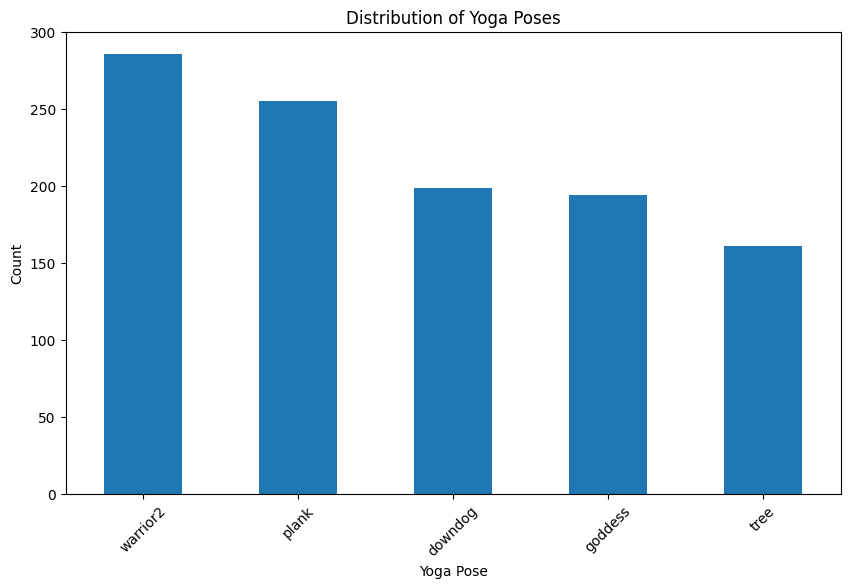


Statistical Summary:
            nose_x       nose_y   left_eye_x   left_eye_y  right_eye_x  \
count  1095.000000  1095.000000  1095.000000  1095.000000  1095.000000   
mean      0.429881     0.322244     0.347460     0.247237     0.352305   
std       0.236503     0.212391     0.251665     0.214712     0.278645   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.296902     0.170657     0.000000     0.000000     0.000000   
50%       0.476926     0.304900     0.429628     0.226184     0.442448   
75%       0.539108     0.464513     0.522146     0.387873     0.516868   
max       0.965985     0.860286     0.948089     0.861520     0.968082   

       right_eye_y   left_ear_x   left_ear_y  right_ear_x  right_ear_y  ...  \
count  1095.000000  1095.000000  1095.000000  1095.000000  1095.000000  ...   
mean      0.230924     0.318179     0.229468     0.308159     0.209044  ...   
std       0.214315     0.264308     0.218217     0.283667     0.211913  ..

In [ ]:
# Perform EDA
pose_counts = df['label'].value_counts()

# Plotting the distribution of yoga poses
plt.figure(figsize=(10, 6))
pose_counts.plot(kind='bar')
plt.title('Distribution of Yoga Poses')
plt.xlabel('Yoga Pose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Display statistical summary of the dataset
print("\nStatistical Summary:")
print(df.describe())

# Following graphs are derived from Confusion Matrix

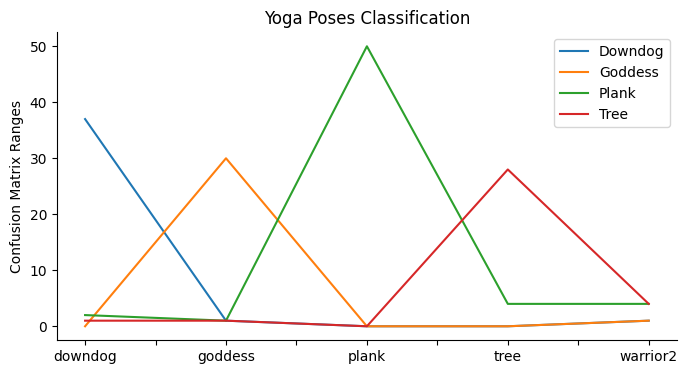

In [ ]:
from matplotlib import pyplot as plt

# Create a combined plot
fig, ax = plt.subplots(figsize=(8, 4))

# Plot each line with labels
df_cm['downdog'].plot(kind='line', ax=ax, title='Yoga Poses Classification', label='Downdog')
df_cm['goddess'].plot(kind='line', ax=ax, label='Goddess')
df_cm['plank'].plot(kind='line', ax=ax, label='Plank')
df_cm['tree'].plot(kind='line', ax=ax, label='Tree')

# Set y-label
plt.ylabel('Confusion Matrix Ranges')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add legend
plt.legend()

# Show the plot
plt.show()

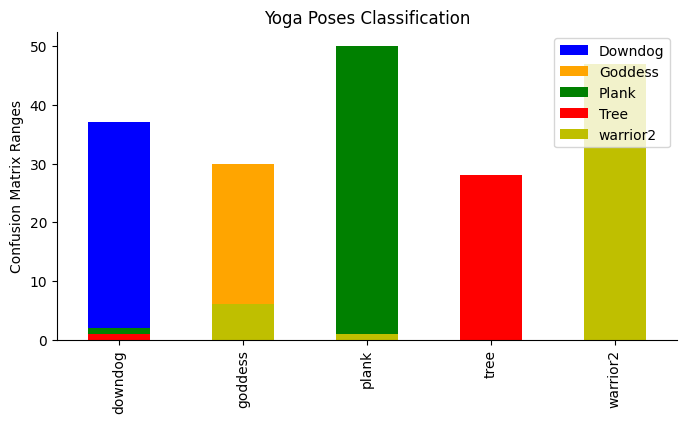

In [ ]:
from matplotlib import pyplot as plt

# Create a combined plot
fig, ax = plt.subplots(figsize=(8, 4))

# Plot each line with labels
df_cm['downdog'].plot(kind='bar', ax=ax, title='Yoga Poses Classification', label='Downdog', color = 'b')
df_cm['goddess'].plot(kind='bar', ax=ax, label='Goddess', color = 'orange')
df_cm['plank'].plot(kind='bar', ax=ax, label='Plank', color = 'g')
df_cm['tree'].plot(kind='bar', ax=ax, label='Tree', color = 'r')
df_cm['warrior2'].plot(kind='bar', ax=ax, label='warrior2', color = 'y')

# Set y-label
plt.ylabel('Confusion Matrix Ranges')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add legend
plt.legend()

# Show the plot
plt.show()